In [34]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
ESSdata = pd.read_csv('ESSdata_Thinkful.csv')

In [4]:
ESSdata.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [22]:
countries = ESSdata.cntry.unique()
countries

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

# Question 1:
Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

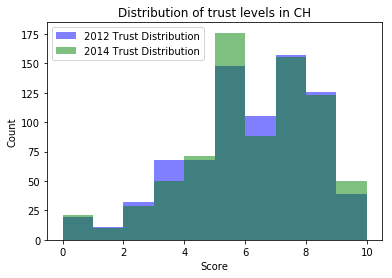

The probability of people in CH having a similar level of trust between 2012 and 2014 is 0.49770110247151234


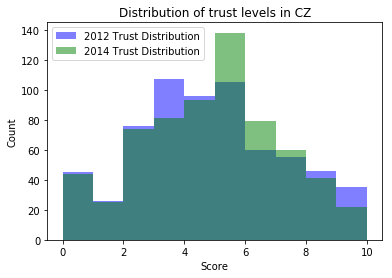

The probability of people in CZ having a similar level of trust between 2012 and 2014 is 0.6337663626856563


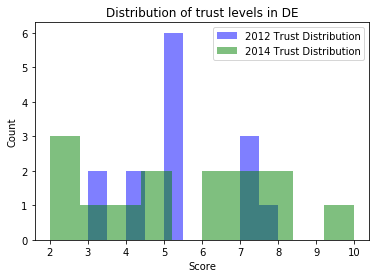

The probability of people in DE having a similar level of trust between 2012 and 2014 is 0.8578926631223287


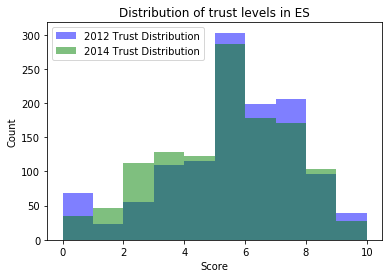

The probability of people in ES having a similar level of trust between 2012 and 2014 is 0.012687599930326627


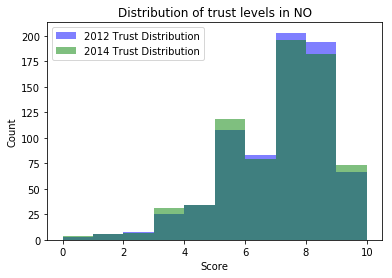

The probability of people in NO having a similar level of trust between 2012 and 2014 is 0.5866849635988214


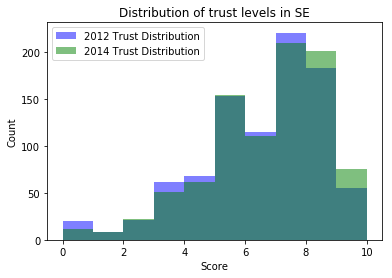

The probability of people in SE having a similar level of trust between 2012 and 2014 is 0.03683208699520371


In [42]:
for country in countries:
    yr2012 = ESSdata[(ESSdata['cntry'] == country) & (ESSdata.year == 6)]
    yr2014 = ESSdata[(ESSdata['cntry'] == country) & (ESSdata.year == 7)]
    yr2012.dropna(subset = ['ppltrst'], inplace = True)
    yr2014.dropna(subset = ['ppltrst'], inplace = True)
    plt.hist(yr2012.ppltrst, color = 'blue', alpha = 0.5, label = '2012 Trust Distribution')
    plt.hist(yr2014.ppltrst, color = 'green', alpha = 0.5, label = '2014 Trust Distribution')
    plt.title("Distribution of trust levels in " + country)
    plt.ylabel('Count')
    plt.xlabel('Score')
    plt.legend()
    plt.show()
    statistic, pvalue = stats.ttest_ind(yr2012.ppltrst, yr2014.ppltrst)
    print('The probability of people in {} having a similar level of trust between 2012 and 2014 is {}'.format(country, pvalue))

It seems people in Spain trusted their government less in 2014 than in 2014.  But in Norway people trusted their government more in 2014 than in 2012.

# Question 2:
Did people become happier from 2012 to 2014? Compute results for each country in the sample.

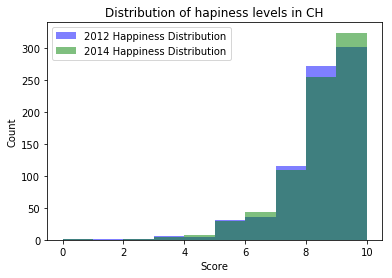

The probability of people in CH having a similar level of happiness between 2012 and 2014 is 0.6977798552554684


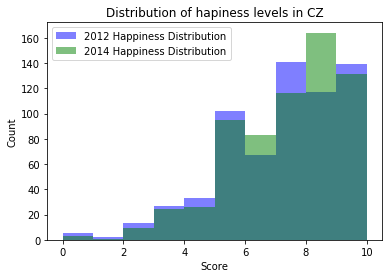

The probability of people in CZ having a similar level of happiness between 2012 and 2014 is 0.19267687243592707


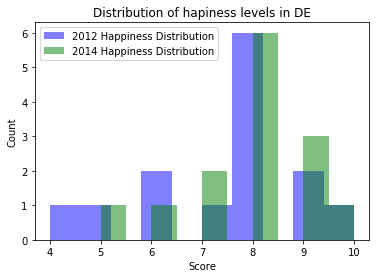

The probability of people in DE having a similar level of happiness between 2012 and 2014 is 0.451246041120838


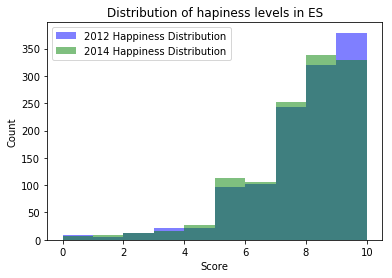

The probability of people in ES having a similar level of happiness between 2012 and 2014 is 0.09426276206929331


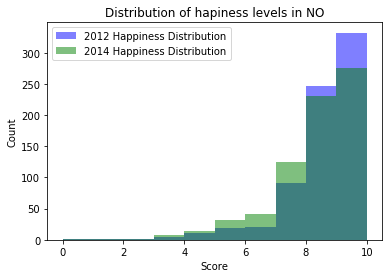

The probability of people in NO having a similar level of happiness between 2012 and 2014 is 2.1241259786815807e-05


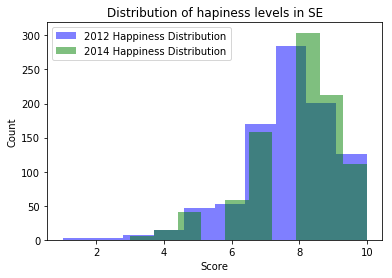

The probability of people in SE having a similar level of happiness between 2012 and 2014 is 0.5654516534862527


In [46]:
for country in countries:
    yr2012 = ESSdata[(ESSdata['cntry'] == country) & (ESSdata.year == 6)]
    yr2014 = ESSdata[(ESSdata['cntry'] == country) & (ESSdata.year == 7)]
    yr2012.dropna(subset = ['happy'], inplace = True)
    yr2014.dropna(subset = ['happy'], inplace = True)
    plt.hist(yr2012.happy, color = 'blue', alpha = 0.5, label = '2012 Happiness Distribution')
    plt.hist(yr2014.happy, color = 'green', alpha = 0.5, label = '2014 Happiness Distribution')
    plt.title("Distribution of hapiness levels in " + country)
    plt.ylabel('Count')
    plt.xlabel('Score')
    plt.legend()
    plt.show()
    statistic, pvalue = stats.ttest_ind(yr2012.happy, yr2014.happy)
    print('The probability of people in {} having a similar level of happiness between 2012 and 2014 is {}'.format(country, pvalue))

In Norway people had a statistically significantly lower level of happiness in 2014 than in 2012.

# Question 3:
Who reported watching more TV in 2012, men or women?

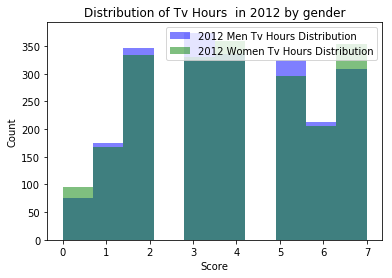

The probability of men and women watched similar amounts of TV in 2012 is 0.4902360402696986


In [52]:
yr2012men = ESSdata[(ESSdata.year == 6) & (ESSdata.gndr == 1)]
yr2012women = ESSdata[(ESSdata.year == 6) & (ESSdata.gndr == 2)]
yr2012men.dropna(subset = ['tvtot'], inplace = True)
yr2012women.dropna(subset = ['tvtot'], inplace = True)
plt.hist(yr2012men.tvtot, color = 'blue', alpha = 0.5, label = '2012 Men Tv Hours Distribution')
plt.hist(yr2012women.tvtot, color = 'green', alpha = 0.5, label = '2012 Women Tv Hours Distribution')
plt.title("Distribution of Tv Hours  in 2012 by gender")
plt.ylabel('Count')
plt.xlabel('Score')
plt.legend()
plt.show()
statistic, pvalue = stats.ttest_ind(yr2012men.tvtot, yr2012women.tvtot)
print('The probability of men and women watched similar amounts of TV in 2012 is {}'.format(pvalue))

There was no significantly different amount of hours of tv watche by men vs women in 2012

# Question 4:
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

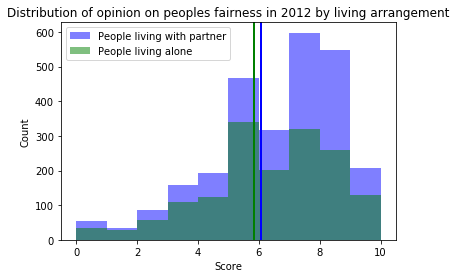

The probability of couples and people living alone having similar views on people being fair is 0.0009


In [60]:
liveswithpartner2012 = ESSdata[(ESSdata.year == 6) & (ESSdata.partner == 1)]
livesalone2012 = ESSdata[(ESSdata.year == 6) & (ESSdata.partner == 2)]

liveswithpartner2012.dropna(subset = ['pplfair'], inplace = True)
livesalone2012.dropna(subset = ['pplfair'], inplace = True)

plt.hist(liveswithpartner2012.pplfair, color = 'blue', alpha = 0.5, label = 'People living with partner')
plt.axvline(liveswithpartner2012.pplfair.mean(), color='blue', linestyle='solid', linewidth=2)
plt.hist(livesalone2012.pplfair, color = 'green', alpha = 0.5, label = 'People living alone')
plt.axvline(livesalone2012.pplfair.mean(), color='green', linestyle='solid', linewidth=2)
plt.title("Distribution of opinion on peoples fairness in 2012 by living arrangement")
plt.ylabel('Count')
plt.xlabel('Score')
plt.legend()
plt.show()

statistic, pvalue = stats.ttest_ind(liveswithpartner2012.pplfair, livesalone2012.pplfair)
print('The probability of couples and people living alone having similar views on people being fair is {}'.format(round(pvalue, 4)))

People living alone were statistically significantly less likely to believe people were fair in 2012 than people living with a significant other

# Question 5:
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

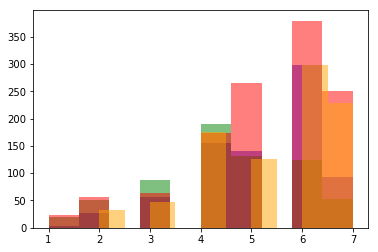

The probability that Switzerland, Czech Republic, Spain, and Sweden all met socialially 
in similar distributions is 9.022991934265128e-43


In [70]:
dropDENO = ESSdata[(ESSdata.year == 7) & (ESSdata.cntry != 'DE') & (ESSdata.cntry != 'NO')]
dropDENO.dropna(subset = ['sclmeet'], inplace = True)
plt.hist(dropDENO[dropDENO.cntry == 'CH'].sclmeet, color = 'blue', alpha = 0.5, label = 'Switzerland')
plt.hist(dropDENO[dropDENO.cntry == 'CZ'].sclmeet, color = 'green', alpha = 0.5, label = 'Czech Republic')
plt.hist(dropDENO[dropDENO.cntry == 'ES'].sclmeet, color = 'red', alpha = 0.5, label = 'Spain')
plt.hist(dropDENO[dropDENO.cntry == 'SE'].sclmeet, color = 'orange', alpha = 0.5, label = 'Sweden')
plt.show()

statistic, pvalue = stats.kruskal(dropDENO[dropDENO.cntry == 'CH'].sclmeet,
                                  dropDENO[dropDENO.cntry == 'CZ'].sclmeet,
                                 dropDENO[dropDENO.cntry == 'ES'].sclmeet,
                                 dropDENO[dropDENO.cntry == 'SE'].sclmeet)

print('The probability that Switzerland, Czech Republic, Spain, and Sweden all met socialially \n' +
      'in similar distributions is {}'.format(pvalue))

It seems that there is a statistically significant difference between the groups meeting socially.  But which countries are different.

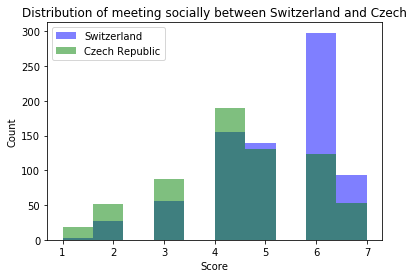

Chance of similarity between Switzerland and Czech Republic is 1.7204743885392493e-21


In [75]:
plt.hist(dropDENO[dropDENO.cntry == 'CH'].sclmeet, color = 'blue', alpha = 0.5, label = 'Switzerland')
plt.hist(dropDENO[dropDENO.cntry == 'CZ'].sclmeet, color = 'green', alpha = 0.5, label = 'Czech Republic')
plt.legend()
plt.title('Distribution of meeting socially between Switzerland and Czech')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()
statistic, pvalue = stats.ttest_ind(dropDENO[dropDENO.cntry == 'CH'].sclmeet,
                                  dropDENO[dropDENO.cntry == 'CZ'].sclmeet)
print('Chance of similarity between Switzerland and Czech Republic is {}'.format(pvalue))

Big difference between Switzerland and Czech republic, lets check to see if it was one of those two countries that stood out.

In [81]:
statistic, pvalue = stats.kruskal(dropDENO[dropDENO.cntry == 'CZ'].sclmeet,
                                 dropDENO[dropDENO.cntry == 'ES'].sclmeet,
                                 dropDENO[dropDENO.cntry == 'SE'].sclmeet)

print('The probability that Czech, Spain, and Sweden all met socialially \n' +
      'in similar distributions is {}'.format(pvalue))

The probability that Czech, Spain, and Sweden all met socialially 
in similar distributions is 4.1433057387857244e-42


In [82]:
statistic, pvalue = stats.kruskal(dropDENO[dropDENO.cntry == 'CH'].sclmeet,
                                 dropDENO[dropDENO.cntry == 'ES'].sclmeet,
                                 dropDENO[dropDENO.cntry == 'SE'].sclmeet)

print('The probability that Switzerland, Spain, and Sweden all met socialially \n' +
      'in similar distributions is {}'.format(pvalue))

The probability that Switzerland, Spain, and Sweden all met socialially 
in similar distributions is 2.7883324361335602e-05


Seems there are still differences between the countries we are looking at.

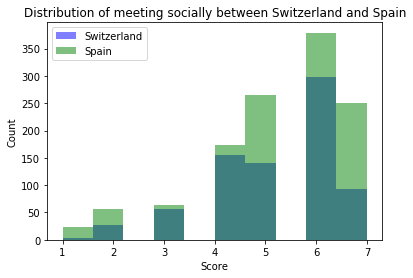

Chance of similarity between Switzerland and Spain is 0.12510774525042745


In [78]:
plt.hist(dropDENO[dropDENO.cntry == 'CH'].sclmeet, color = 'blue', alpha = 0.5, label = 'Switzerland')
plt.hist(dropDENO[dropDENO.cntry == 'ES'].sclmeet, color = 'green', alpha = 0.5, label = 'Spain')
plt.legend()
plt.title('Distribution of meeting socially between Switzerland and Spain')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()
statistic, pvalue = stats.ttest_ind(dropDENO[dropDENO.cntry == 'CH'].sclmeet,
                                  dropDENO[dropDENO.cntry == 'ES'].sclmeet)
print('Chance of similarity between Switzerland and Spain is {}'.format(pvalue))

Spain and Switzerland met socially at similar rates.  No statistically significant differences there.

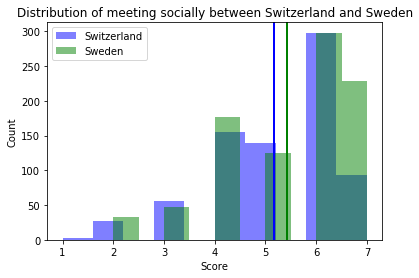

Chance of similarity between Switzerland and Sweden is 5.654598600313532e-05


In [80]:
plt.hist(dropDENO[dropDENO.cntry == 'CH'].sclmeet, color = 'blue', alpha = 0.5, label = 'Switzerland')
plt.axvline(dropDENO[dropDENO.cntry == 'CH'].sclmeet.mean(), color='blue', linestyle='solid', linewidth=2)
plt.hist(dropDENO[dropDENO.cntry == 'SE'].sclmeet, color = 'green', alpha = 0.5, label = 'Sweden')
plt.axvline(dropDENO[dropDENO.cntry == 'SE'].sclmeet.mean(), color='green', linestyle='solid', linewidth=2)
plt.legend()
plt.title('Distribution of meeting socially between Switzerland and Sweden')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()
statistic, pvalue = stats.ttest_ind(dropDENO[dropDENO.cntry == 'CH'].sclmeet,
                                  dropDENO[dropDENO.cntry == 'SE'].sclmeet)
print('Chance of similarity between Switzerland and Sweden is {}'.format(pvalue))

Looks like there is a statistically significant difference between Switzerland and Sweden.  People in Sweden met socially more often than people in Switzerland.

# Question 6
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [90]:
dropDENO = ESSdata[(ESSdata.year == 7) & (ESSdata.cntry != 'DE') & (ESSdata.cntry != 'NO')]
dropDENO.dropna(subset = ['sclact'], inplace = True)
oldppl = dropDENO[(dropDENO.year == 7) & (dropDENO.agea > dropDENO.agea.mean())]
youngppl = dropDENO[(dropDENO.year == 7) & (dropDENO.agea < dropDENO.agea.mean())]


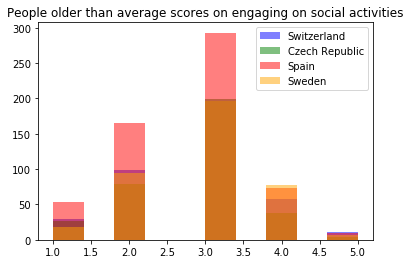

The probability that young people in Switzerland, Czech Republic, Spain, and Sweden all engaged in social activies 
in similar distributions is 0.0043426874690635844


In [98]:
plt.hist(youngppl[youngppl.cntry == 'CH'].sclact, color = 'blue', alpha = 0.5, label = 'Switzerland')
plt.hist(youngppl[youngppl.cntry == 'CZ'].sclact, color = 'green', alpha = 0.5, label = 'Czech Republic')
plt.hist(youngppl[youngppl.cntry == 'ES'].sclact, color = 'red', alpha = 0.5, label = 'Spain')
plt.hist(youngppl[youngppl.cntry == 'SE'].sclact, color = 'orange', alpha = 0.5, label = 'Sweden')
plt.title('People older than average scores on engaging on social activities')
plt.legend()
plt.show()

statistic, pvalue = stats.kruskal(youngppl[youngppl.cntry == 'CH'].sclact,
                                  youngppl[youngppl.cntry == 'CZ'].sclact,
                                 youngppl[youngppl.cntry == 'ES'].sclact,
                                 youngppl[youngppl.cntry == 'SE'].sclact)

print('The probability that young people in Switzerland, Czech Republic, Spain, and Sweden all engaged in social activies \n' +
      'in similar distributions is {}'.format(pvalue))

Seems that young people tend to engage in social activites in statistically significantly different rates in these countries.  But which ones.

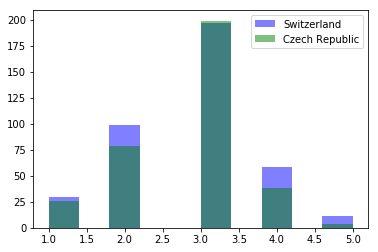

Chance of similarity between Switzerland and Czech Republic is 0.46051880219500596


In [102]:
plt.hist(youngppl[youngppl.cntry == 'CH'].sclact, color = 'blue', alpha = 0.5, label = 'Switzerland')
plt.hist(youngppl[youngppl.cntry == 'CZ'].sclact, color = 'green', alpha = 0.5, label = 'Czech Republic')
plt.legend()
plt.show()
statistic, pvalue = stats.ttest_ind(youngppl[youngppl.cntry == 'CH'].sclact,
                                  youngppl[youngppl.cntry == 'CZ'].sclact)
print('Chance of similarity between Switzerland and Czech Republic is {}'.format(pvalue))

Seems Switzerland and Czech Republic are statiscally similar.  So which country is different from them for young people?

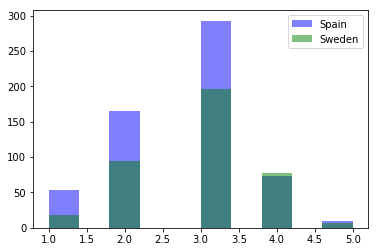

Chance of similarity between Spain and Sweden is 0.00032470769252993594


In [103]:
plt.hist(youngppl[youngppl.cntry == 'ES'].sclact, color = 'blue', alpha = 0.5, label = 'Spain')
plt.hist(youngppl[youngppl.cntry == 'SE'].sclact, color = 'green', alpha = 0.5, label = 'Sweden')
plt.legend()
plt.show()
statistic, pvalue = stats.ttest_ind(youngppl[youngppl.cntry == 'ES'].sclact,
                                  youngppl[youngppl.cntry == 'SE'].sclact)
print('Chance of similarity between Spain and Sweden is {}'.format(pvalue))

Spain and Sweden show a significant difference in rates of social activities with Spain engaging in fewer.  Lets see if Spain is the outlier.  As the rest of the countries are further north.

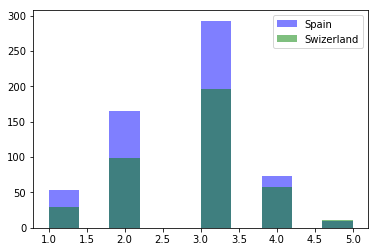

Chance of similarity between Spain and Switzerland is 0.07693175629479299


In [105]:
plt.hist(youngppl[youngppl.cntry == 'ES'].sclact, color = 'blue', alpha = 0.5, label = 'Spain')
plt.hist(youngppl[youngppl.cntry == 'CH'].sclact, color = 'green', alpha = 0.5, label = 'Swizerland')
plt.legend()
plt.show()
statistic, pvalue = stats.ttest_ind(youngppl[youngppl.cntry == 'ES'].sclact,
                                  youngppl[youngppl.cntry == 'CH'].sclact)
print('Chance of similarity between Spain and Switzerland is {}'.format(pvalue))

Looks like Spain is close to being different from Switzerland.  It seems likely that Spain is the country that stands out.  Lets compare the three countries without Spain now.

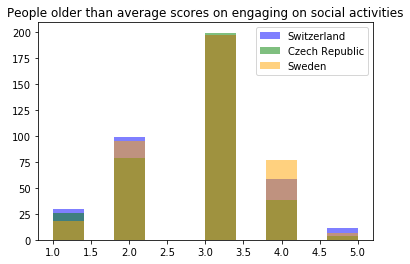

The probability that young people in Switzerland, Czech Republic, and Sweden all engaged in social activies 
in similar distributions is 0.07194314328683828


In [106]:
plt.hist(youngppl[youngppl.cntry == 'CH'].sclact, color = 'blue', alpha = 0.5, label = 'Switzerland')
plt.hist(youngppl[youngppl.cntry == 'CZ'].sclact, color = 'green', alpha = 0.5, label = 'Czech Republic')
plt.hist(youngppl[youngppl.cntry == 'SE'].sclact, color = 'orange', alpha = 0.5, label = 'Sweden')
plt.title('People older than average scores on engaging on social activities')
plt.legend()
plt.show()

statistic, pvalue = stats.kruskal(youngppl[youngppl.cntry == 'CH'].sclact,
                                  youngppl[youngppl.cntry == 'CZ'].sclact,
                                 youngppl[youngppl.cntry == 'SE'].sclact)

print('The probability that young people in Switzerland, Czech Republic, and Sweden all engaged in social activies \n' +
      'in similar distributions is {}'.format(pvalue))

Looks like spain was the country that stood out as the remaining three countries show no significant statisitcal differece in the rates of engaging in social activies.  Lets look at old people.

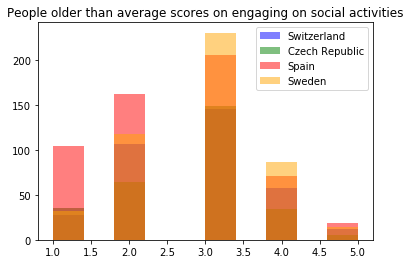

The probability that old people Switzerland, Czech Republic, Spain, and Sweden all engaged in social activies 
in similar distributions is 6.221337828524445e-07


In [97]:
plt.hist(oldppl[oldppl.cntry == 'CH'].sclact, color = 'blue', alpha = 0.5, label = 'Switzerland')
plt.hist(oldppl[oldppl.cntry == 'CZ'].sclact, color = 'green', alpha = 0.5, label = 'Czech Republic')
plt.hist(oldppl[oldppl.cntry == 'ES'].sclact, color = 'red', alpha = 0.5, label = 'Spain')
plt.hist(oldppl[oldppl.cntry == 'SE'].sclact, color = 'orange', alpha = 0.5, label = 'Sweden')
plt.title('People older than average scores on engaging on social activities')
plt.legend()
plt.show()

statistic, pvalue = stats.kruskal(oldppl[oldppl.cntry == 'CH'].sclact,
                                  oldppl[oldppl.cntry == 'CZ'].sclact,
                                 oldppl[oldppl.cntry == 'ES'].sclact,
                                 oldppl[oldppl.cntry == 'SE'].sclact)

print('The probability that old people Switzerland, Czech Republic, Spain, and Sweden all engaged in social activies \n' +
      'in similar distributions is {}'.format(pvalue))

Well, as with young people we see a difference, just looking at the graphs it looks like that difference is still spain.  Lets check the three countries without spain and see if the same is true for old people as young people.

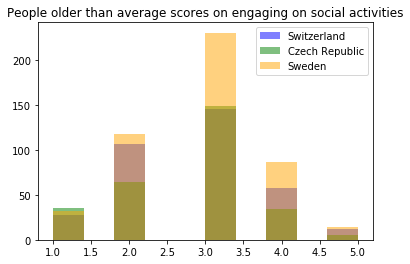

The probability that old people Switzerland, Czech Republic, and Sweden all engaged in social activies 
in similar distributions is 0.05721509227879425


In [107]:
plt.hist(oldppl[oldppl.cntry == 'CH'].sclact, color = 'blue', alpha = 0.5, label = 'Switzerland')
plt.hist(oldppl[oldppl.cntry == 'CZ'].sclact, color = 'green', alpha = 0.5, label = 'Czech Republic')
plt.hist(oldppl[oldppl.cntry == 'SE'].sclact, color = 'orange', alpha = 0.5, label = 'Sweden')
plt.title('People older than average scores on engaging on social activities')
plt.legend()
plt.show()

statistic, pvalue = stats.kruskal(oldppl[oldppl.cntry == 'CH'].sclact,
                                  oldppl[oldppl.cntry == 'CZ'].sclact,
                                 oldppl[oldppl.cntry == 'SE'].sclact)

print('The probability that old people Switzerland, Czech Republic, and Sweden all engaged in social activies \n' +
      'in similar distributions is {}'.format(pvalue))

Low and behold.  It seems that Spanish people, regardless of age, tend to stand out and engage in social activities less than the other three countries.